# Question 1
**Implement a perceptron using the IRIS dataset. Perform backpropagation for two iterations.**

A single-layer perceptron is the basic unit of a neural network. A perceptron consists of
input values,

1.   weights and a bias,
2.   a weighted sum
3. activation function

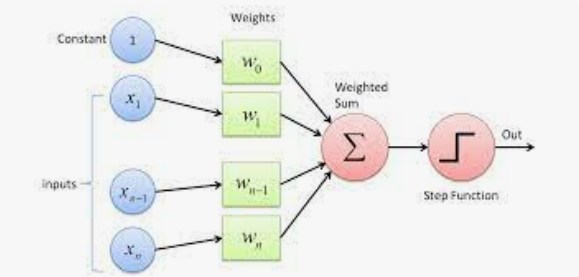

The function chosen as the activation function is the unit step function.
A Perceptron is able to classify linear seprable,binary data, however the IRIS dataset is mutliclass. Thefore, only 2 classes of the IRIS dataset are chosen for this question which are 0 = setosa and 1 = versicolor. To make a perceptron classify multiclass data, One vs All or One vs One method can be used. Multiple perceptrons can also be used for the same


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
labels = iris.target





In [ ]:
indices = np.where((labels == 0) | (labels == 1))[0]

# Filter the data and labels to only include examples with labels 0 and 1
data = data[indices]
labels = labels[indices]

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
data.shape

(100, 4)

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
labels.shape

(100,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=0.2, random_state=123
    )

In [ ]:
X_train[0].shape

(4,)

In [ ]:
 y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1])

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate,iter=2):# two iterations are chosen
        self.W = np.random.randn(input_size)* (8.3-0.1) + 0.1 # Weigths randomly initialzed and normalized
        self.b = 0
        self.learning_rate = learning_rate
        self.epochs=iter

    def predicti(self, Xi):
        z = np.dot(Xi, self.W) + self.b
        return z
    def activation(self,x):
      return np.where(x > 0 , 1, 0)

    def prediction(self, X):
        l= np.dot(X, self.W) + self.b
        y_= self.activation(l)
        return y_
    def rms_loss(self,pred,act):
        diff = pred - act
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()
        return mean_diff

    def train(self, X, y):

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
               WT_b=self.predicti(X[i])
               y_pred = self.activation(WT_b)
               loss=0
               if y_pred != y[i]:
                    self.W += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.b += self.learning_rate * (y[i] - y_pred)
                    loss += self.rms_loss(y_pred,y[i])
            print("loss for epoch ",epoch," is ", loss)

In [ ]:
X_train

array([[5.1, 3.3, 1.7, 0.5],
       [6.7, 3.1, 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [5. , 2. , 3.5, 1. ],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.7, 3. , 5. , 1.7],
       [4.4, 3. , 1.3, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.6, 3. , 4.4, 1.4],
       [5. , 3.2, 1.2, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [6.1, 3. , 4.6, 1.4],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [5.5, 2.3, 4. , 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [6.2, 2.9, 4.3, 1.3],
       [6. , 2.2, 4. , 1. ],
       [4.8, 3. , 1.4, 0.1],
       [5.4, 3.4, 1.7, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [4.9, 3.6, 1.4, 0.1],
       [5.2, 2.7, 3.9, 1.4],
       [4.9, 3

In [ ]:
model=Perceptron(4,0.02,2)
model.train(X_train,y_train)

loss for epoch  0  is  1.0
loss for epoch  1  is  0


In [ ]:
predictions = model.prediction(X_test)



In [ ]:
predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy(y_test, predictions) * 100))

Accuracy: 95.00%


# Question 2
Implement an MLP using the IRIS dataset. Perform backpropagation for 15 iterations. The initial
weights of the MLP should be randomly initialized. You can choose the activation function and
loss function at your convenience, which gives the best performance.
The MLP should have 2 hidden layers, one with 4 neurons and one with 5 neurons. The input
layer should have 4 neurons and the output layer should have 3 neurons.



**MLP Architechture**

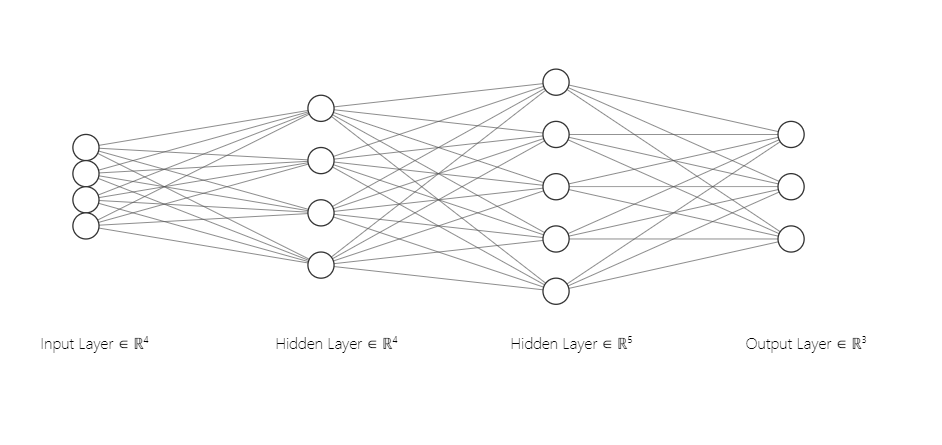

1. Taking 2 iteration is done in the following code:


  ```
   def __init__(self, input_size, learning_rate,**iter=2**)
   ```
2. number of neurons in each layer is done when an inference of the class MLP is called in the line



```
model = MLP(4,4,5,3)
```
3. Weight for the bias layer are randomly initialzed and normalized in the following code


```
self.W1 = np.random.randn(input_size, hidden1_size)*np.sqrt(1./(hidden1_size)

```

4. 15 iterations are done in the following code when model.fit() function is called


```
for i in range(15):
```











Sigmoid is used as an activation function and RMS is chosen as the loss function

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
y_onehot = np.zeros((y.size, y.max()+1))
y_onehot[np.arange(y.size),y] = 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.33, random_state=42)

class MLP:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        self.W1 = np.random.randn(input_size, hidden1_size)*np.sqrt(1./(hidden1_size))# Weigths randomly initialzed and normalized
        self.b1 = np.random.randn(hidden1_size)
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(1. / hidden2_size)# Weigths randomly initialzed and normalized
        self.b2 = np.random.randn(hidden2_size)
        self.W3 = np.random.randn(hidden2_size, output_size)* np.sqrt(1. / output_size)# Weigths randomly initialzed and normalized
        self.b3 = np.random.randn(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)
        return self.a3

    def backward(self, X, y, learning_rate):
        delta3 = (self.a3 - y) * (self.a3 * (1 - self.a3))
        dJdW3 = np.dot(self.a2.T, delta3)
        dJdb3 = np.sum(delta3, axis=0)
        delta2 = np.dot(delta3, self.W3.T) * (self.a2 * (1 - self.a2))
        dJdW2 = np.dot(self.a1.T, delta2)
        dJdb2 = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, self.W2.T) * (self.a1 * (1 - self.a1))
        dJdW1 = np.dot(X.T, delta1)
        dJdb1 = np.sum(delta1, axis=0)
        self.W3 -= learning_rate * dJdW3
        self.W2 -= learning_rate * dJdW2
        self.W1 -= learning_rate * dJdW1
        self.b1 -= learning_rate * dJdb1
        self.b2 -= learning_rate * dJdb2
        self.b3 -= learning_rate * dJdb3


In [ ]:
X_train.shape

(100, 4)

In [ ]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [ ]:
y_train.shape

(100, 3)

In [ ]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
model = MLP(4,4,5,3)

In [ ]:
def fit(X_train,y_train,lr):


# Perform backpropagation for 15 iterations
  for i in range(15):
    # Perform a forward pass
    y_pred = model.forward(X_train)

    # Perform a backward pass
    model.backward(X_train, y_train, learning_rate=0.1)


In [ ]:
model = MLP(4,4,5,3)
fit(X_train,y_train,0.1)
y_test_pred = model.forward(X_test)


y_test_pred_class = np.argmax(y_test_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)

accuracy = np.mean(y_test_pred_class == y_test_class)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.00%
